In [10]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os

# CSV files

#### Read in data

In [11]:
data_list = []

with open("data_in/iamHandwriting/ascii/words.txt") as f:
    for line in f:
        if line[0] == "#":
            continue
        line = line.replace("\n", "")
        l_split = line.split(" ", 8)
        
        data_dict = dict()
        data_dict["wordID"] = l_split[0]
        data_dict["segmentation"] = l_split[1]
        data_dict["bin_thresh"] = int(l_split[2])
        data_dict["x_bound"] = int(l_split[3])
        data_dict["y_bound"] = int(l_split[4])
        data_dict["w_bound"] = int(l_split[5])
        data_dict["h_bound"] = int(l_split[6])
        data_dict["grammar"] = l_split[7]
        data_dict["transcription"] = l_split[8]
        data_list.append(data_dict)

data_df = pd.DataFrame(data_list)
data_df = data_df[["wordID", "transcription",
                   "segmentation", "bin_thresh", "x_bound", "y_bound",
                   "w_bound", "h_bound", "grammar"]]

#### Add new columns

In [12]:
# location columns
data_df["prefix"] = [x.split("-")[0] for x in data_df["wordID"]]
data_df["form"] = ["-".join([x.split("-")[0], x.split("-")[1]])
                            for x in data_df["wordID"]]
local_path = os.getcwd().replace("\\", "/") + "/"
data_df["path"] = local_path + "data_in/iamHandwriting/words/" + data_df["prefix"] + "/" + data_df["form"] + "/" + data_df["wordID"] + ".png"

#### Find freqency of letters

In [13]:
letters = dict()

for tran in data_df.transcription:
    for l in list(tran):
        if l not in letters:
            letters[l] = 0
        letters[l] += 1
letters = sorted(letters.items(), key = lambda f: f[1], reverse=True)
# print(letters)

#### Get rid of unwanted rows

369.0 129.0


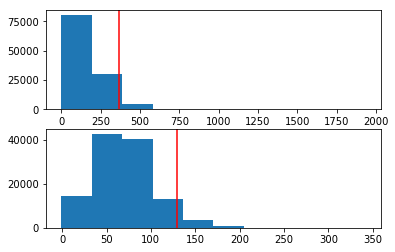

In [14]:
w95 = np.percentile(data_df.w_bound, 95)
h95 = np.percentile(data_df.h_bound, 95)
print(w95, h95)

# size columns
import matplotlib.pyplot as plt
plt.subplot(211)
plt.hist(data_df.w_bound)
plt.axvline(x=w95, color="r")
plt.subplot(212)
plt.hist(data_df.h_bound)
plt.axvline(x=h95, color="r")
plt.show()

In [15]:
# get rid of the really big images
data_df = data_df[np.logical_and(data_df.w_bound < w95, data_df.h_bound < h95)]

In [16]:
# image is broken
data_df = data_df[data_df.wordID != "r06-022-03-05"]

In [17]:
# get only words that are entirely lowercase letters
data_df["lower"] = [all([y.islower() for y in x]) 
                     for x in data_df["transcription"]]

data_df = data_df[data_df["lower"]].loc[:,["path", "transcription"]]

#### Save only lowercase words

In [18]:
data_df.to_csv("./data/train.csv", sep="\t", index=False)